In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving NEW_API_kaggle.json to NEW_API_kaggle.json


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp NEW_API_kaggle.json ~/.kaggle/

In [ ]:
! mv /content/NEW_API_kaggle.json /root/.kaggle/kaggle.json

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                              title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                           Netflix Movies and TV Shows                        1MB  2024-04-10 09:48:38           8918        189  1.0              
mexwell/heart-disease-dataset                                    🫀 Heart Disease Dataset                          399KB  2024-04-08 09:43:49           4481         77  1.0              
jaceprater/smokers-health-data                                   Smoker's Health Data                              29KB  2024-04-20 17:09:38           2019         26  1.0              
willianoliveiragibin/clean-water                                 Clean

In [ ]:
!kaggle datasets download -d landrykezebou/uot32-underwater-object-tracking-dataset

Dataset URL: https://www.kaggle.com/datasets/landrykezebou/uot32-underwater-object-tracking-dataset
License(s): other
100% 3.40G/3.40G [01:58<00:00, 33.0MB/s]
100% 3.40G/3.40G [01:58<00:00, 30.8MB/s]


In [ ]:
!unzip uot32-underwater-object-tracking-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: SeaTurtle1/img/632.jpg  
  inflating: SeaTurtle1/img/633.jpg  
  inflating: SeaTurtle1/img/634.jpg  
  inflating: SeaTurtle1/img/635.jpg  
  inflating: SeaTurtle1/img/636.jpg  
  inflating: SeaTurtle1/img/637.jpg  
  inflating: SeaTurtle1/img/638.jpg  
  inflating: SeaTurtle1/img/639.jpg  
  inflating: SeaTurtle1/img/64.jpg   
  inflating: SeaTurtle1/img/640.jpg  
  inflating: SeaTurtle1/img/641.jpg  
  inflating: SeaTurtle1/img/642.jpg  
  inflating: SeaTurtle1/img/643.jpg  
  inflating: SeaTurtle1/img/644.jpg  
  inflating: SeaTurtle1/img/645.jpg  
  inflating: SeaTurtle1/img/646.jpg  
  inflating: SeaTurtle1/img/647.jpg  
  inflating: SeaTurtle1/img/648.jpg  
  inflating: SeaTurtle1/img/649.jpg  
  inflating: SeaTurtle1/img/65.jpg   
  inflating: SeaTurtle1/img/650.jpg  
  inflating: SeaTurtle1/img/651.jpg  
  inflating: SeaTurtle1/img/652.jpg  
  inflating: SeaTurtle1/img/653.jpg  
  inflating: SeaTurtle1/img/654.jpg  

Number of images: 1662
[0/5][0/26]	Loss_D: 1.3046	Loss_G: 2.2581	D(x): 0.5329	D(G(z)): 0.4790 / 0.1079
[1/5][0/26]	Loss_D: 0.0218	Loss_G: 7.8802	D(x): 0.9920	D(G(z)): 0.0137 / 0.0004
[2/5][0/26]	Loss_D: 0.0167	Loss_G: 9.2812	D(x): 0.9939	D(G(z)): 0.0104 / 0.0001
[3/5][0/26]	Loss_D: 2.7139	Loss_G: 8.2093	D(x): 0.0836	D(G(z)): 0.0003 / 0.0003
[4/5][0/26]	Loss_D: 0.8556	Loss_G: 9.1628	D(x): 0.9192	D(G(z)): 0.5153 / 0.0002


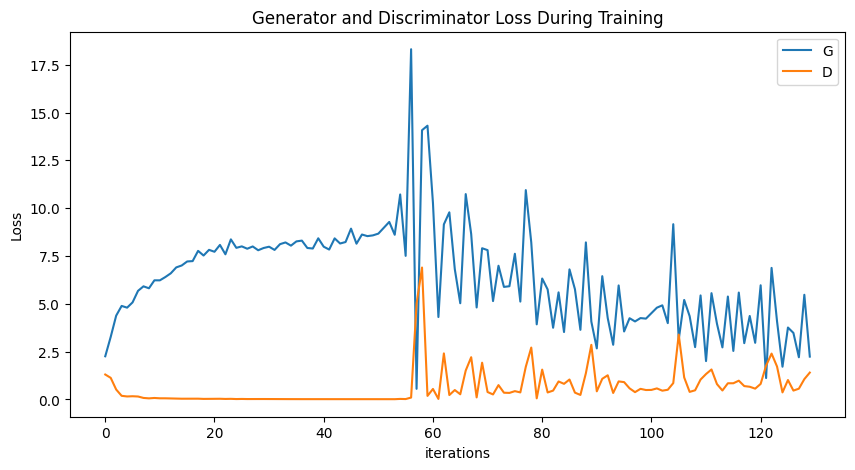

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.utils as vutils
import cv2
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as PSNR
from skimage.metrics import structural_similarity as SSIM

# Generator network
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            # Define layers for Generator
            nn.ConvTranspose2d(100, 64 * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(64 * 8),
            nn.ReLU(True),
            nn.ConvTranspose2d(64 * 8, 64 * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 4),
            nn.ReLU(True),
            nn.ConvTranspose2d(64 * 4, 64 * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 2),
            nn.ReLU(True),
            nn.ConvTranspose2d(64 * 2, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)

# Discriminator network
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            # Define layers for Discriminator
            nn.Conv2d(3, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 64 * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64 * 2, 64 * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64 * 4, 64 * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64 * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

# Custom dataset class for loading images without class labels
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images = os.listdir(root_dir)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.images[idx])
        image = Image.open(img_name)
        if self.transform:
            image = self.transform(image)
        return image

# Initialize Generator and Discriminator
generator = Generator()
discriminator = Discriminator()

# Set device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define dataset directory
dataset_dir = "/content/Octopus1/img"

# Define transform
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Load dataset using custom dataset class
dataset = CustomDataset(root_dir=dataset_dir, transform=transform)

# DataLoader
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Check number of images
print("Number of images:", len(dataset))

# Training function
def train_gan(generator, discriminator, dataloader, num_epochs, device):
    # Loss function
    criterion = nn.BCELoss()

    # Optimizers
    optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
    optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

    # Lists to keep track of progress
    G_losses = []
    D_losses = []

    # Training loop
    for epoch in range(num_epochs):
        for i, data in enumerate(dataloader, 0):
            # Training Discriminator with real images
            discriminator.zero_grad()
            real_images = data
            real_images = real_images.to(device)
            real_labels = torch.full((real_images.size(0),), 1, dtype=torch.float, device=device)
            output = discriminator(real_images).view(-1)
            D_real_loss = criterion(output, real_labels)
            D_real_loss.backward()
            D_x = output.mean().item()

            # Training Discriminator with fake images
            noise = torch.randn(real_images.size(0), 100, 1, 1, device=device)
            fake_images = generator(noise)
            fake_labels = torch.full((real_images.size(0),), 0, dtype=torch.float, device=device)
            output = discriminator(fake_images.detach()).view(-1)
            D_fake_loss = criterion(output, fake_labels)
            D_fake_loss.backward()
            D_G_z1 = output.mean().item()
            D_loss = D_real_loss + D_fake_loss
            optimizer_D.step()

            # Training Generator
            generator.zero_grad()
            output = discriminator(fake_images).view(-1)
            G_loss = criterion(output, real_labels)
            G_loss.backward()
            D_G_z2 = output.mean().item()
            optimizer_G.step()

            # Output training stats
            if i % 50 == 0:
                print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                      % (epoch, num_epochs, i, len(dataloader),
                         D_loss.item(), G_loss.item(), D_x, D_G_z1, D_G_z2))

            # Save Losses for plotting later
            G_losses.append(G_loss.item())
            D_losses.append(D_loss.item())

    # Plot training losses
    plt.figure(figsize=(10,5))
    plt.title("Generator and Discriminator Loss During Training")
    plt.plot(G_losses,label="G")
    plt.plot(D_losses,label="D")
    plt.xlabel("iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

# Train GAN
num_epochs = 5
train_gan(generator, discriminator, dataloader, num_epochs, device)

# Process video
def process_video(video_path, generator):
    cap = cv2.VideoCapture(video_path)

    # Check if video opened successfully
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    # Create output video writer
    output_path = 'output_video.avi'
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'DIVX'), 30, (frame_width, frame_height))

    # Read video frames and process them
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Convert frame to tensor and apply normalization
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = transforms.ToTensor()(frame)
        frame = (frame - 0.5) / 0.5  # Normalize

        # Process frame using the generator
        with torch.no_grad():
            generated_frame = generator(frame.unsqueeze(0)).squeeze(0)

        # Convert tensor back to numpy array
        generated_frame = (generated_frame.permute(1, 2, 0).numpy() * 0.5 + 0.5) * 255  # De-normalize
        generated_frame = generated_frame.clip(0, 255).astype(np.uint8)

        # Write the generated frame to output video
        out.write(cv2.cvtColor(generated_frame, cv2.COLOR_RGB2BGR))

    # Release video capture and close video writer
    cap.release()
    out.release()
    print("Video processing complete. Output saved as:", output_path)


# Visualize enhanced images and evaluate metrics
def visualize_results(dataloader, generator):
    psnr_values = []
    ssim_values = []
    with torch.no_grad():
        for i, data in enumerate(dataloader):
            original_images = dataset_dir
            enhanced_images = generator(original_images.to(device))

            # Convert tensors to numpy arrays
            original_images_np = vutils.make_grid(original_images, normalize=True).permute(1, 2, 0).cpu().numpy()
            enhanced_images_np = vutils.make_grid(enhanced_images, normalize=True).permute(1, 2, 0).cpu().numpy()

            # Calculate PSNR and SSIM
            for j in range(len(original_images)):
                original_img = original_images_np[j]
                enhanced_img = enhanced_images_np[j]

                # Calculate PSNR and SSIM for each image pair
                psnr_val = PSNR(original_img, enhanced_img)
                ssim_val = SSIM(original_img, enhanced_img, multichannel=True)
                psnr_values.append(psnr_val)
                ssim_values.append(ssim_val)

                # Display images
                plt.figure(figsize=(10, 5))
                plt.subplot(1, 2, 1)
                plt.imshow(original_img)
                plt.title('Original Image')
                plt.axis('off')
                plt.subplot(1, 2, 2)
                plt.imshow(enhanced_img)
                plt.title('Enhanced Image')
                plt.axis('off')
                plt.show()

                # Print metrics for each image pair
                print(f'Image {j+1}:')
                print(f'PSNR: {psnr_val:.2f}, SSIM: {ssim_val:.2f}')

    # Calculate average PSNR and SSIM
    avg_psnr = np.mean(psnr_values)
    avg_ssim = np.mean(ssim_values)
    print(f'Average PSNR: {avg_psnr:.2f}, Average SSIM: {avg_ssim:.2f}')

# Example usage:
# visualize_results(dataloader, generator)
